<a href="https://colab.research.google.com/github/111LoNE111/Assignments/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/cell/cell_images.zip','r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
import glob
infected=glob.glob('/content/cell_images/Parasitized//*.png')
uninfected=glob.glob('/content/cell_images/Uninfected//*.png')

In [ ]:
import pandas as pd
images=pd.DataFrame({'file':infected+uninfected, 'class': ['infected']*len(infected)+['healthy']*len(uninfected)}).sample(frac=1, random_state=21).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(images['file'].values, images['class'].values, test_size=0.3)

In [ ]:
!pip install -q openCV-python

In [ ]:
import cv2
import numpy as np
l=[]
for s in range(len(images['file'])):
  l.append(cv2.imread(images['file'][s]).shape)
print('max dimension:',np.max(l,axis=0))
print('min dimension:',np.min(l,axis=0))
print('average dimension:', np.mean(l,axis=0))
print('median dimension:', np.median(l,axis=0))  

max dimension: [385 394   3]
min dimension: [40 46  3]
average dimension: [132.98345308 132.48715437   3.        ]
median dimension: [130. 130.   3.]


In [ ]:
import cv2
import numpy as np
newimage=[]
for i in range(x_train.shape[0]):
  j=cv2.imread(x_train[i])
  j=cv2.resize(j,dsize=(127,127),interpolation=cv2.INTER_CUBIC)
  j=np.array(j,dtype=np.float32)
  newimage.append(j)
data_train=(np.array(newimage))/255.

In [ ]:
newimage1=[]
for m in range(x_test.shape[0]):
  k=cv2.imread(x_test[m])
  k=cv2.resize(k,dsize=(127,127),interpolation=cv2.INTER_CUBIC)
  k=np.array(k,dtype=np.float32)
  newimage1.append(k)
data_test=(np.array(newimage1))/255.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [ ]:
!pip install -q keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import MaxPooling2D, Dropout, Flatten

model=Sequential()
model.add(Conv2D(32,3,3,input_shape=(127,127,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
x=model.fit(data_train,y_train, batch_size=60, epochs=3, validation_data=(data_test,y_test), verbose=1)

          

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(127, 127,..., activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 125, 125, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

RuntimeError: ignored

In [ ]:
y_pred=model.predict(data_test[[10]])
print(y_pred>0.5)

[[ True]]


Confusion Matrix: 
 [[4019  116]
 [ 270 3863]]

 
 ACCURACY: 95.0 % 
 



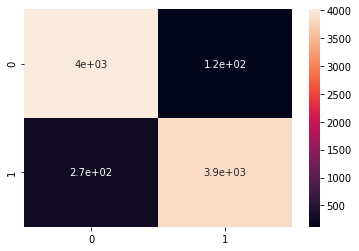

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm=confusion_matrix(y_test,(y_pred>0.5))
print('Confusion Matrix:','\n',cm)
accuracy=accuracy_score(y_test,(y_pred>0.5))
acc=round(accuracy,2)
print('\n','\n','ACCURACY:',(acc*100),'%','\n','\n')
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
target=['Healthy','Infected']
print('\n','\n','Classification Report:',(classification_report(y_test,(y_pred>0.5),target_names=target)))


 
 Classification Report:               precision    recall  f1-score   support

     Healthy       0.94      0.97      0.95      4135
    Infected       0.97      0.93      0.95      4133

    accuracy                           0.95      8268
   macro avg       0.95      0.95      0.95      8268
weighted avg       0.95      0.95      0.95      8268



In [ ]:
model.save_weights('model_weight.h5')
json=model.to_json()
with open('model_file.json','w') as json_file:
  json_file.write(json)